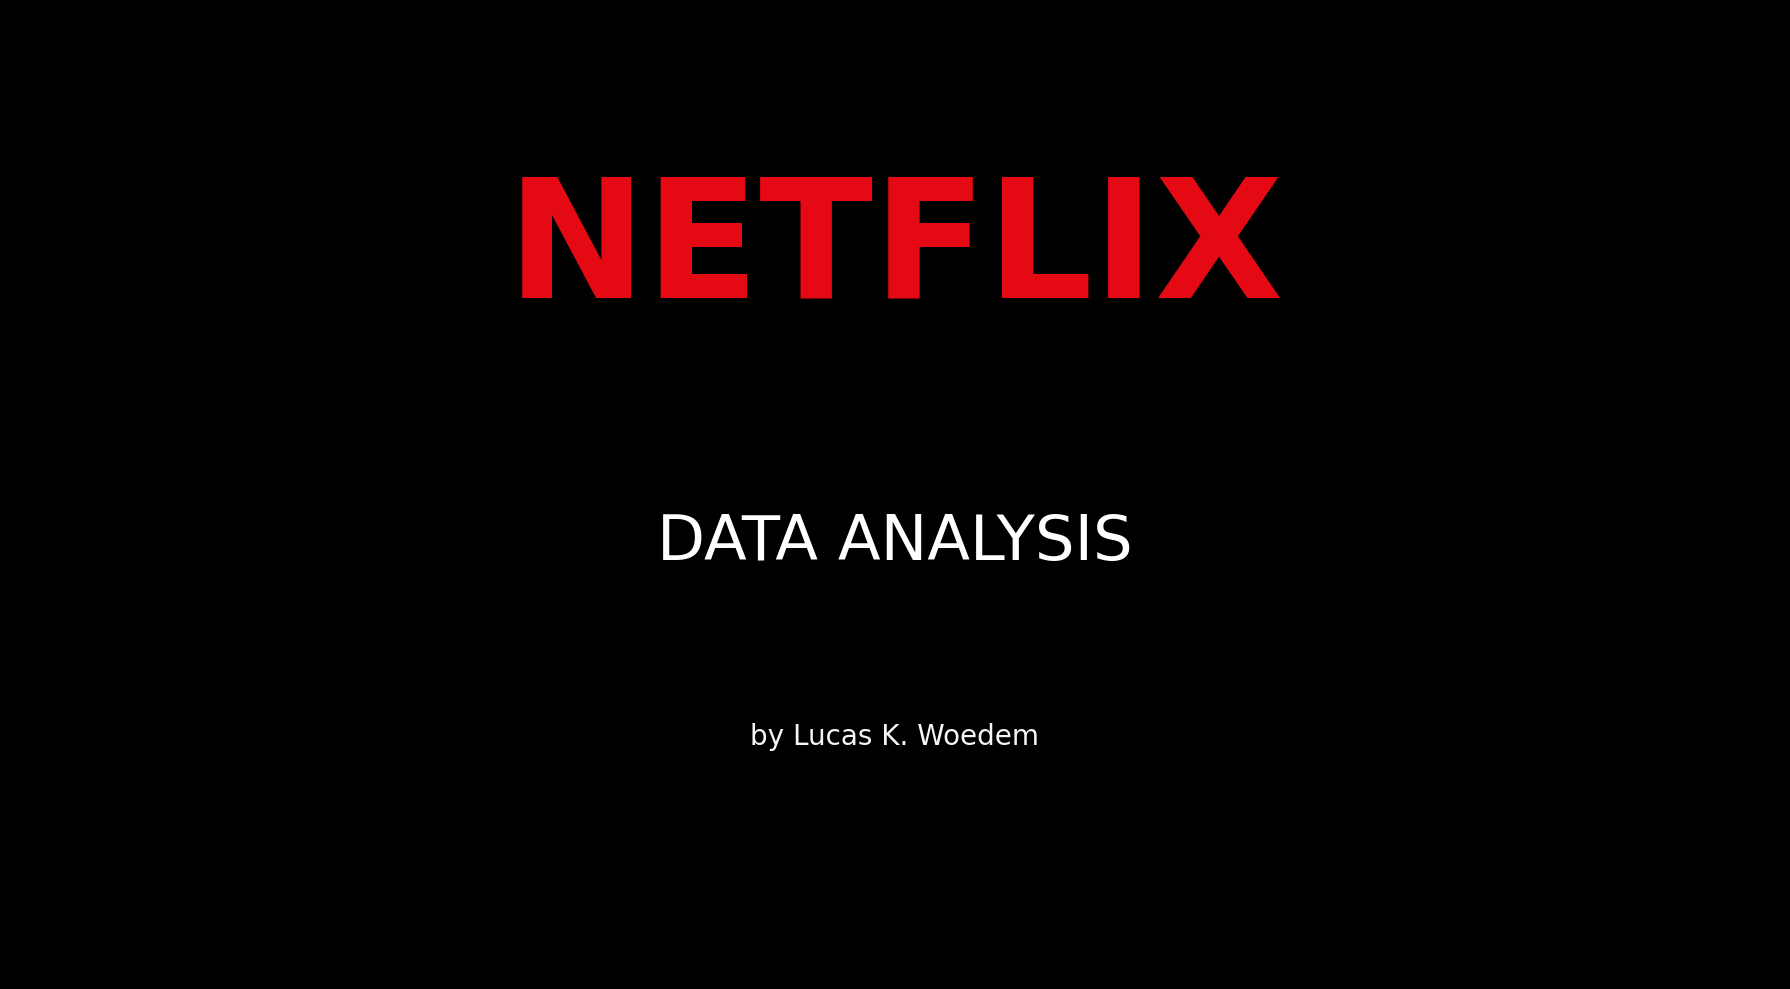

In [42]:
#from lucas.stay_overnight import new_succesful_project
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from IPython.display import display, HTML, Image
import seaborn as sns

# --- Section 0: Title Card/Banner---
plt.figure(facecolor='black', figsize=(18, 10))

plt.text(0.5, 0.75, 'NETFLIX',
         fontsize=120, fontweight='bold',
         ha='center', va='center',
         color='#E50914',
         fontfamily='sans-serif')

plt.text(0.5, 0.45, 'DATA ANALYSIS',
         fontsize=45,
         ha='center', va='center',
         color='white',
         fontfamily='sans-serif')

plt.text(0.5, 0.25, 'by Lucas K. Woedem',
         fontsize=20,
         ha='center', va='center',
         color='#F5F5F5',
         fontfamily='sans-serif')

plt.axis('off')
plt.tight_layout()
plt.show()

## --- Section 1: Data Loading and Initial Inspection ---

In [44]:
data = pd.read_csv(r"C:\Dataset\Netflix.csv")

In [45]:
print("--- Data Head ---")
print(data.head())

--- Data Head ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septembe

In [46]:
print("\n--- Data Types ---")
data.dtypes#print(data.dtypes)


--- Data Types ---


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [47]:
print("\n--- Data Shape ---")
print(data.shape)


--- Data Shape ---
(8807, 12)


In [48]:
print("\n--- Data Info ---")
data.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## --- Section 2: Data Cleaning ---

In [50]:
# --- Duplicate Records Check ---
print("\n--- Duplicate Records Check ---")
duplicates = data.duplicated().sum()
print(f"Number of duplicate records found: {duplicates}")
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

# --- Missing Values Before Treatment ---
print("\n--- Missing Values Before Treatment ---")
print(data.isnull().sum())

# Fill missing 'director' with 'Unknown'
data['director'] = data['director'].fillna('Unknown')

# Fill missing 'country' with the mode
country_mode = data['country'].mode()[0]
data['country'] = data['country'].fillna(country_mode)

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract year and month from 'date_added'
data['added_year'] = data['date_added'].dt.year
data['added_month'] = data['date_added'].dt.month_name()

# Drop original 'date_added' if no longer needed
data.drop(['date_added'], axis=1, inplace=True)

# Fill missing 'rating' with mode
rating_mode = data['rating'].mode()[0]
data['rating'] = data['rating'].fillna(rating_mode)

# Create a full datetime column 'added_full_date' from 'added_year'
# Only if needed for timeline plots or sorting
data['added_full_date'] = pd.to_datetime(data['added_year'], format='%Y', errors='coerce')

# Extract proper month name
data['month_released'] = data['added_full_date'].dt.month_name()

# --- Missing Values After Treatment ---
print("\n--- Missing Values After Treatment ---")
print(data.isnull().sum())

# --- Data Types After Treatment ---
print("\n--- Data Types After Treatment ---")
print(data.dtypes)


--- Duplicate Records Check ---
Number of duplicate records found: 0
Shape after removing duplicates: (8807, 12)

--- Missing Values Before Treatment ---
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

--- Missing Values After Treatment ---
show_id              0
type                 0
title                0
director             0
cast               825
country              0
release_year         0
rating               0
duration             3
listed_in            0
description          0
added_year          98
added_month         98
added_full_date     98
month_released      98
dtype: int64

--- Data Types After Treatment ---
show_id                    object
type                       object
title                      object
director                   object
cast      

## --- Section 3: Content Type Distribution ---


--- Content Type Distribution ---
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


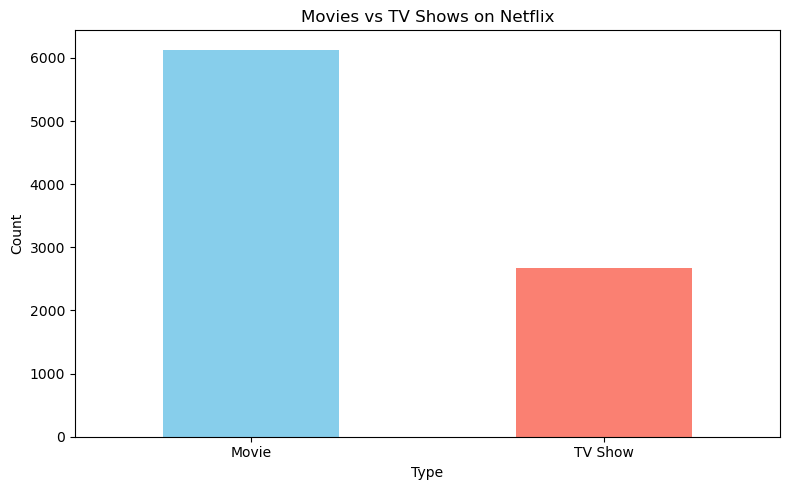

  
PIE CHART 


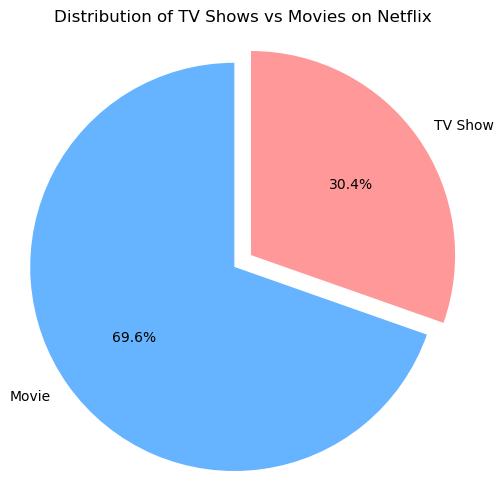

In [112]:
print("\n--- Content Type Distribution ---")
content_counts = data['type'].value_counts()
print(content_counts)

plt.figure(figsize=(8, 5))
content_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Plotting the pie chart
type_counts = data['type'].value_counts()
print("  ")
print("PIE CHART ")

plt.figure(figsize=(6, 6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    explode=[0.05, 0.05] 
)
plt.title('Distribution of TV Shows vs Movies on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## --- Section 4: Yearly Release Trends ---


--- Year with Highest Number of Releases (Top 10) ---
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


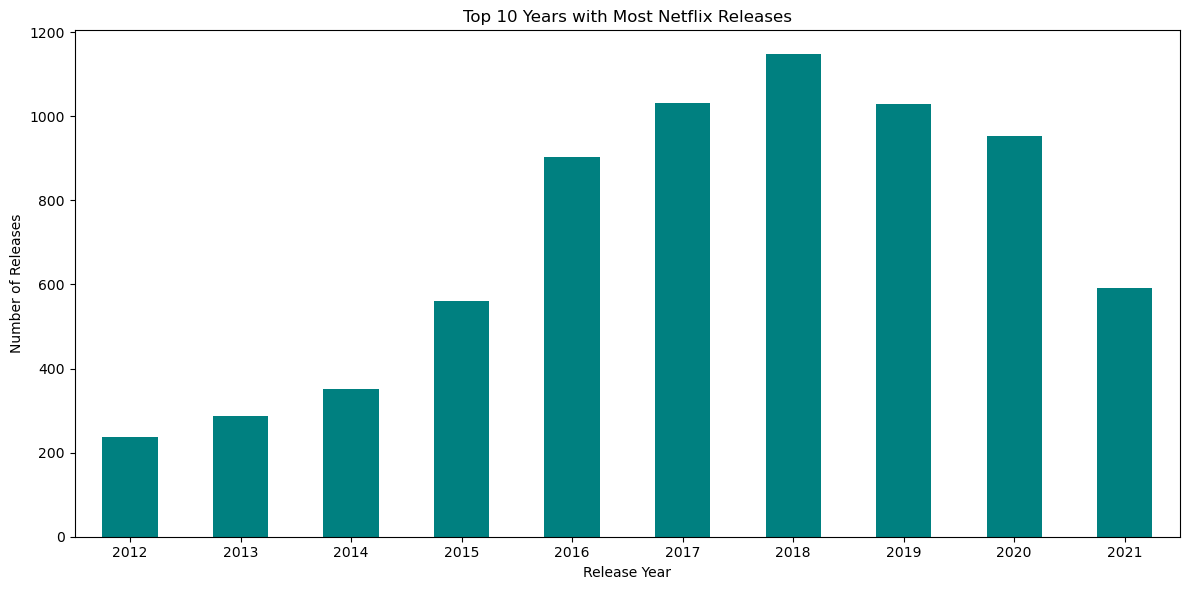

In [54]:
print("\n--- Year with Highest Number of Releases (Top 10) ---")
yearly_counts = data['release_year'].value_counts().head(10)
print(yearly_counts)

plt.figure(figsize=(10, 5))
yearly_counts.sort_index().plot(kind='bar', color='teal')
plt.title('Top 10 Years with Most Netflix Releases')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## --- Section 5: Indian TV Shows by Release Year ---


--- TV Shows Released in India ---


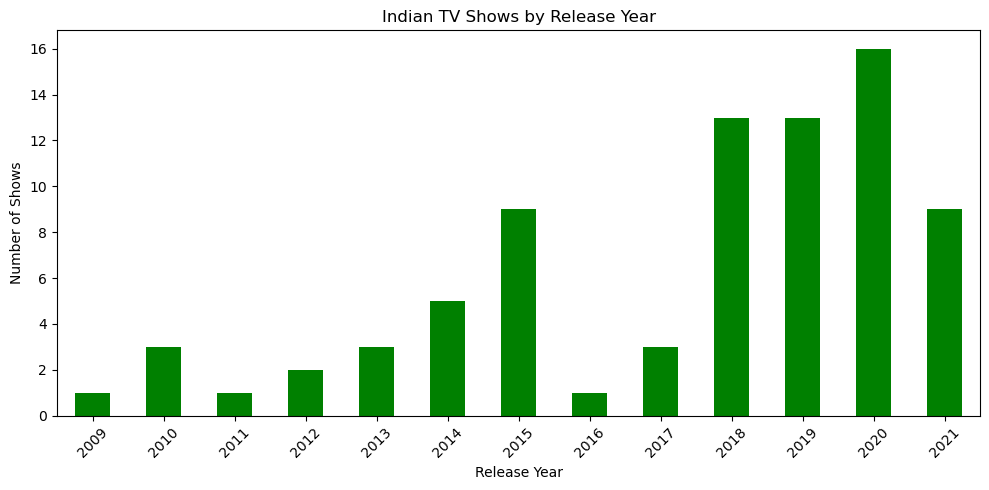

In [56]:
print("\n--- TV Shows Released in India ---")
# Filter TV Shows released in India
indian_tv = data[(data['type'] == 'TV Show') & (data['country'] == 'India')]

# Group by actual release year
indian_tv_releases_by_year = indian_tv['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
indian_tv_releases_by_year.plot(kind='bar', color='green')
plt.title('Indian TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## --- Section 6: Top 10 Directors ---


--- Top 10 Directors ---
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


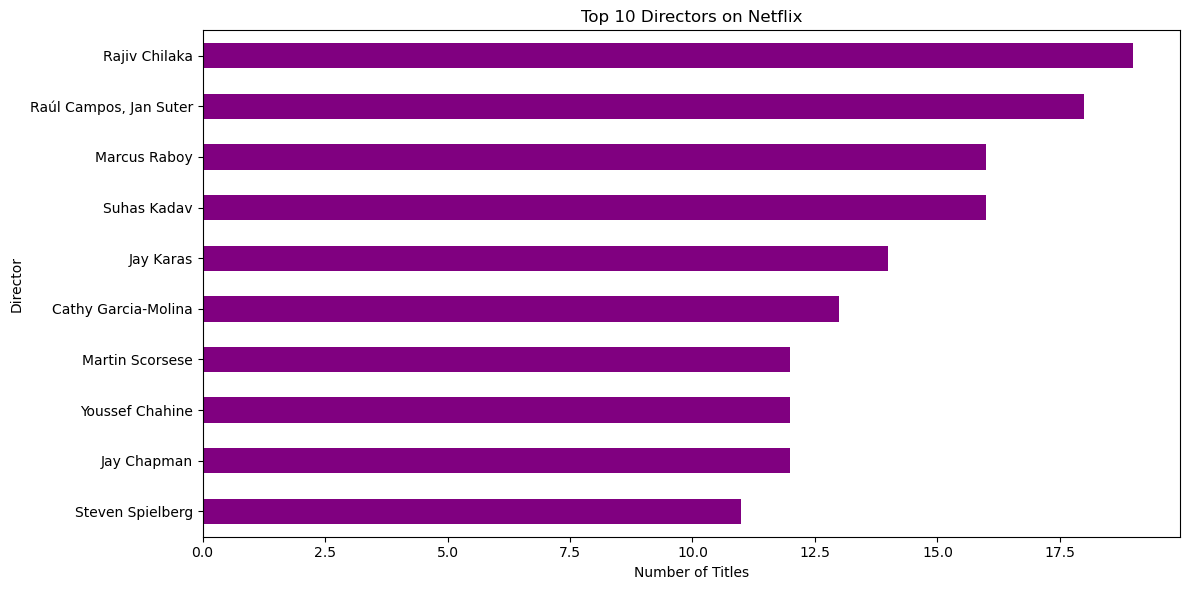

In [58]:
print("\n--- Top 10 Directors ---")
# Exclude missing/unknown directors
director_data = data[data['director'] != 'Unknown']

# Get top 10 most frequent directors
top_directors = director_data['director'].value_counts().head(10)
print(top_directors)

# Plotting
plt.figure(figsize=(10, 5))
top_directors.plot(kind='barh', color='purple')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Highest value at top
plt.tight_layout()
plt.show()

## --- Section 7: Content Ratings ---


--- Content Ratings ---
rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


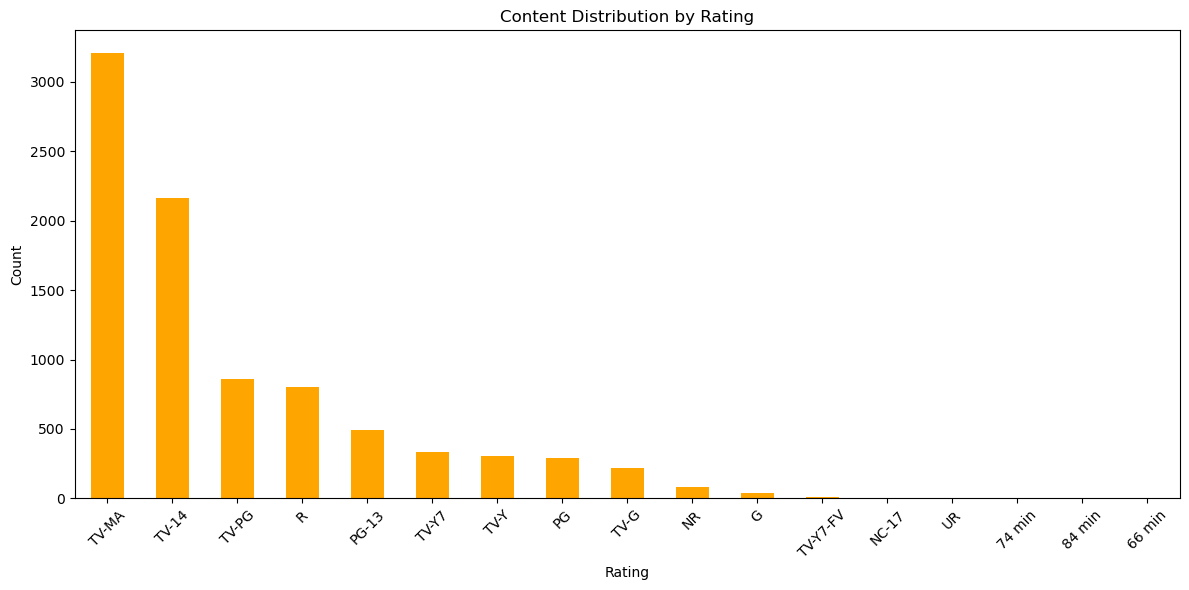

In [60]:
print("\n--- Content Ratings ---")
ratings = data['rating'].value_counts()
print(ratings)

plt.figure(figsize=(10, 5))
ratings.plot(kind='bar', color='orange')
plt.title('Content Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## --- Section 8: Duration Analysis ---


--- Duration Analysis ---
Longest Movie: 312.0 minutes
TV Show with most seasons: 17.0 seasons


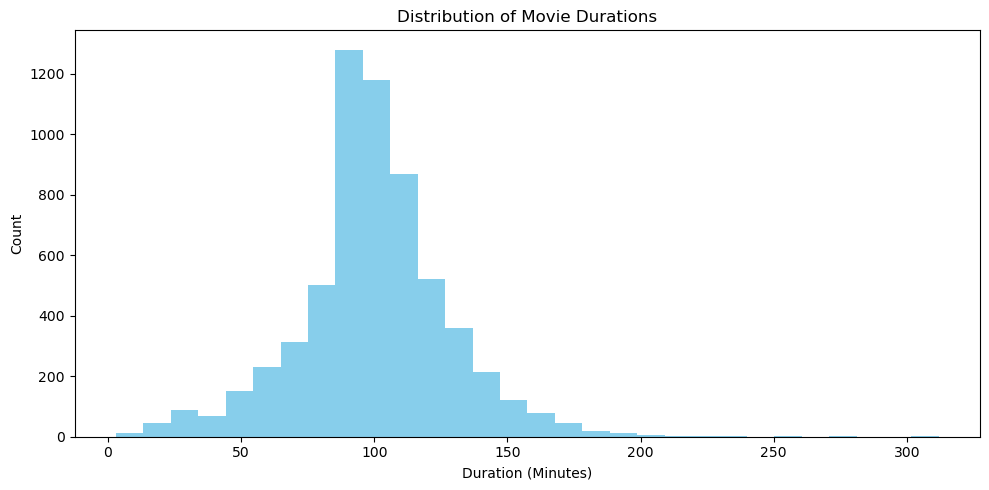

In [66]:
print("\n--- Duration Analysis ---")

# Filter and process movies
movies = data[data['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

# Filter and process TV shows
tv_shows = data[data['type'] == 'TV Show'].copy()
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Output results
print(f"Longest Movie: {movies['duration'].max()} minutes")
print(f"TV Show with most seasons: {tv_shows['duration_seasons'].max()} seasons")

# Plot distribution
plt.figure(figsize=(10, 5))
movies['duration'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## --- Section 9: Top Countries by TV Show Production ---


--- Country with most TV Shows (Top 5) ---
country
United States     1151
United Kingdom     213
Japan              169
South Korea        158
India               79
Name: count, dtype: int64


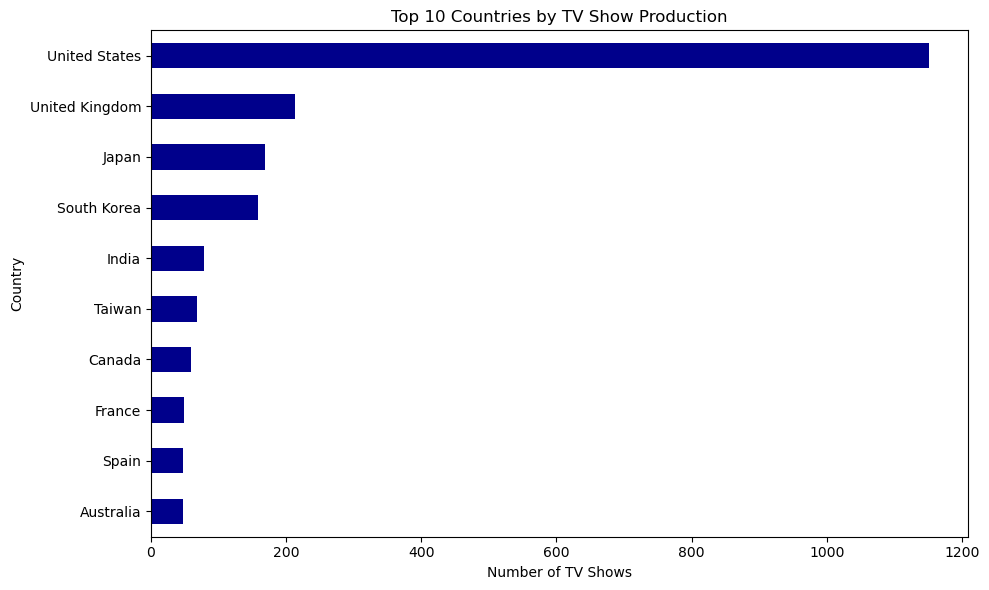

In [70]:
print("\n--- Country with most TV Shows (Top 5) ---")

country_tv = data[data['type'] == 'TV Show']['country'].value_counts()
print(country_tv.head(5))

plt.figure(figsize=(10, 6))
country_tv.head(10).sort_values(ascending=True).plot(kind='barh', color='darkblue')
plt.title('Top 10 Countries by TV Show Production')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## --- Section 10: Monthly Release Trends ---


--- Monthly Release Trends ---
added_month
January      727
February     557
March        734
April        759
May          626
June         724
July         819
August       749
September    765
October      755
November     697
December     797
Name: count, dtype: int64


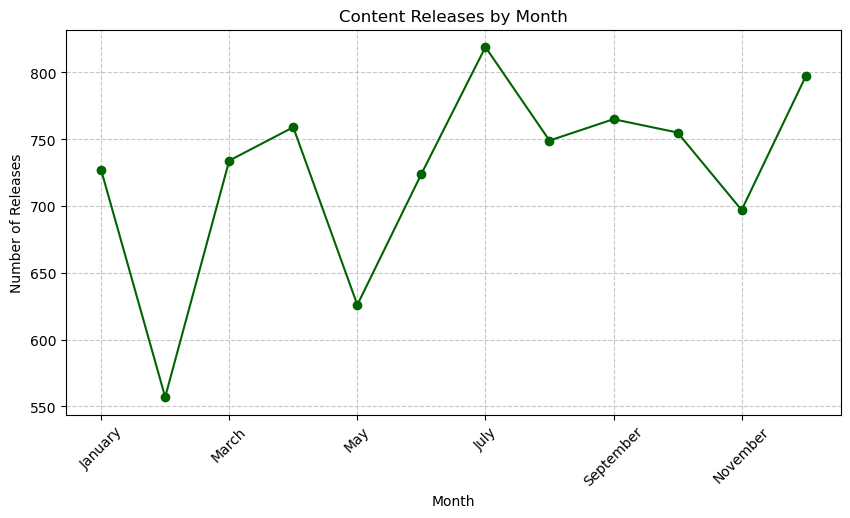

In [94]:
print("\n--- Monthly Release Trends ---")

# Make sure months are in the correct title-case format
data['added_month'] = data['added_month'].str.title()

monthly_releases = data['added_month'].value_counts()

months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Reindex to ensure correct order
monthly_releases = monthly_releases.reindex(months_order)

print(monthly_releases)

# Plotting
plt.figure(figsize=(10, 5))
monthly_releases.plot(kind='line', marker='o', color='darkgreen')
plt.title('Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## --- Section 11: Content by Country (Top 10 - All Content) ---


--- Top 10 Countries by Content Production (All Content) ---
country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


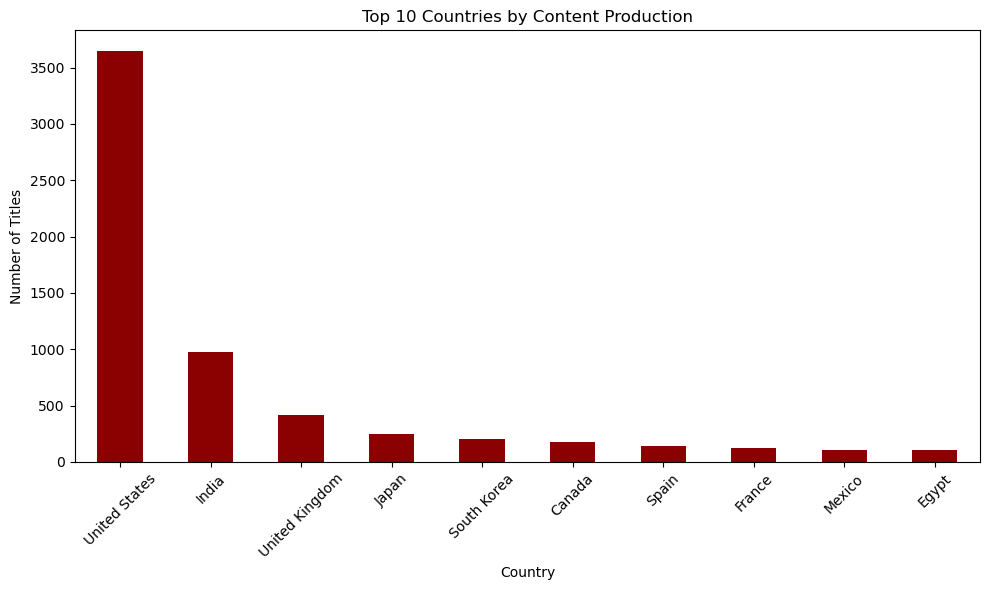

In [98]:
print("\n--- Top 10 Countries by Content Production (All Content) ---")

top_countries_all = data['country'].value_counts().head(10)
print(top_countries_all)

plt.figure(figsize=(10, 6))
top_countries_all.plot(kind='bar', color='darkred')
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## --- Section 12: Content Type Distribution by Rating (Heatmap) ---


--- Content Type Distribution by Rating (Crosstab) ---
type      Movie  TV Show
rating                  
66 min        1        0
74 min        1        0
84 min        1        0
G            41        0
NC-17         3        0
NR           75        5
PG          287        0
PG-13       490        0
R           797        2
TV-14      1427      733
TV-G        126       94
TV-MA      2064     1147
TV-PG       540      323
TV-Y        131      176
TV-Y7       139      195
TV-Y7-FV      5        1
UR            3        0


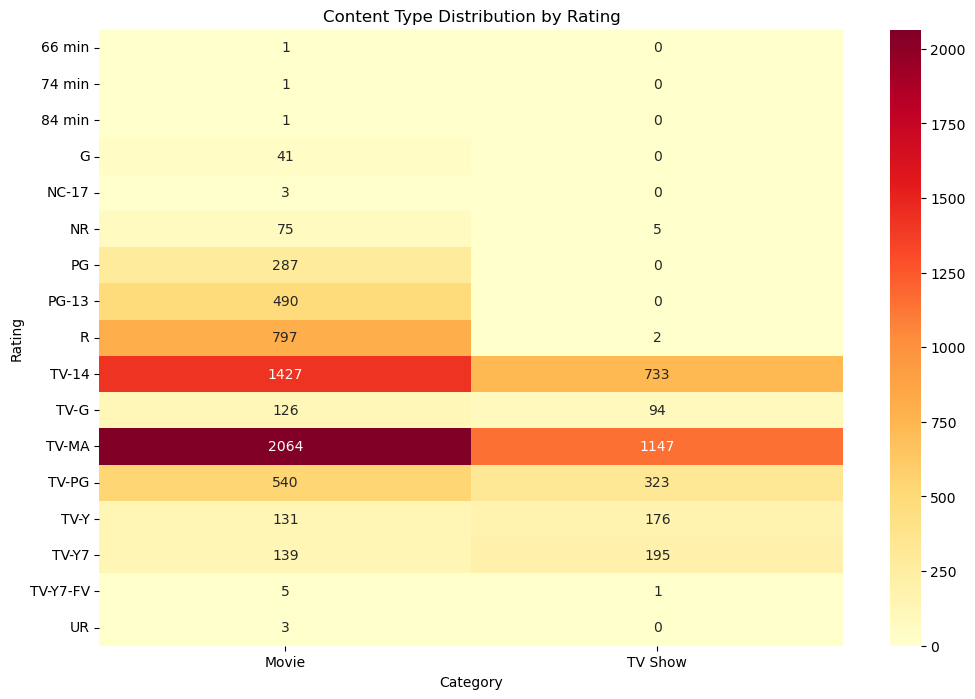

In [78]:
print("\n--- Content Type Distribution by Rating (Crosstab) ---")

# Create a cross-tabulation of 'Rating' and 'Category'
rating_by_type = pd.crosstab(data['rating'], data['type'])
print(rating_by_type)

plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the distribution
# annot=True to show actual values, fmt='d' for integers
# cmap='YlOrRd' gives a yellow-orange-red color gradient
sns.heatmap(rating_by_type, annot=True, fmt='d', cmap='YlOrRd')

plt.title('Content Type Distribution by Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()